In [29]:
import pickle as p
import matplotlib.pyplot as plt

stats_crnn = './../results/training_stats/CRNN_8500.pkl'
stats_ccnn = './../results/training_stats/CCNN_10500.pkl'
stats_crnn_conditioning = './../results/training_stats/CRNN_Conditioning_50000.pkl'
stats_reduced_dp = './../results/training_stats/CRNN_Conditioning_Reduced_Dropout_4500.pkl'

In [30]:
data = {}

with open(stats_crnn_conditioning, 'rb') as f:
    data['CRNN_Conditioning'] = p.load(f)
with open(stats_crnn, 'rb') as f:
    data['CRNN'] = p.load(f)
with open(stats_ccnn, 'rb') as f:
    data['CCNN'] = p.load(f)
with open(stats_reduced_dp, 'rb') as f:
    data['CRNN_Conditioning (with Reduced Dropout)'] = p.load(f)

In [31]:
scores = {}

for j in data.keys():
    scores[j] = {}
    scores[j]['x'] = []
    scores[j]['onset_mae'] = []
    scores[j]['offset_mae'] = []
    scores[j]['vel_mae'] = []
    scores[j]['frame_ap'] = []
    for i in data[j]['validation']:                 # CHANGE DATA SPLIT HERE
        scores[j]['frame_ap'].append(i['frame_ap'])
        scores[j]['onset_mae'].append(i['reg_onset_mae'])
        scores[j]['offset_mae'].append(i['reg_offset_mae'])
        scores[j]['vel_mae'].append(i['velocity_mae'])
        scores[j]['x'].append(i['iteration'])

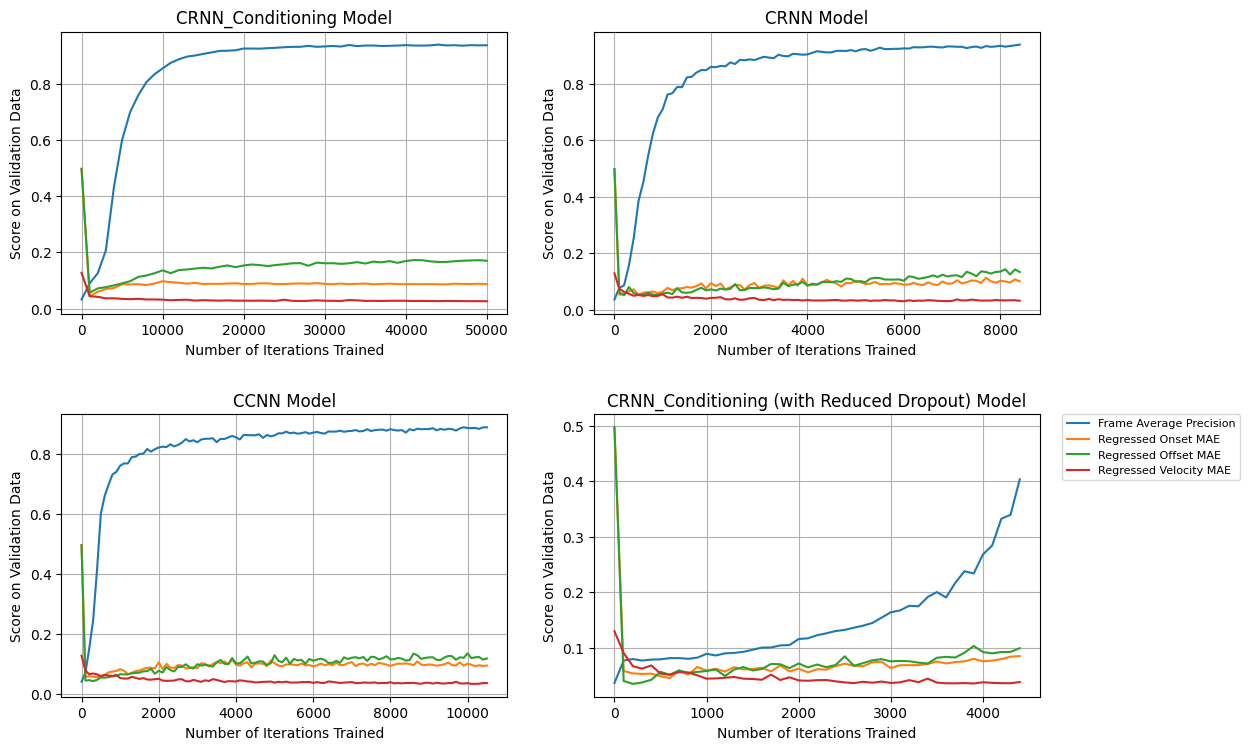

In [32]:
import matplotlib.pyplot as plt

# Assuming x is defined for your plots

# Creating a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(13, 8))

# Plotting in the first subplot
j = 0
for i in data.keys():
    axs[(j // 2)% 2, j % 2].plot(scores[i]['x'], scores[i]['frame_ap'], label='Frame Average Precision')
    axs[(j // 2)% 2, j % 2].plot(scores[i]['x'], scores[i]['onset_mae'], label='Regressed Onset MAE')
    axs[(j // 2)% 2, j % 2].plot(scores[i]['x'], scores[i]['offset_mae'], label='Regressed Offset MAE')
    axs[(j // 2)% 2, j % 2].plot(scores[i]['x'], scores[i]['vel_mae'], label='Regressed Velocity MAE')
    axs[(j // 2)% 2, j % 2].set_title(i + ' Model')
    axs[(j // 2)% 2, j % 2].set_xlabel('Number of Iterations Trained')
    axs[(j // 2)% 2, j % 2].set_ylabel('Score on Validation Data')
    axs[(j // 2)% 2, j % 2].grid(True)
    j += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.tight_layout(pad=2.5)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# For regression post processor
ccnn_wgru_wcon = pd.read_csv('../results/evaluation_results/CCNN_regressed.txt', sep=':', names=['eval','value'])
ccnn_wcon = pd.read_csv('../results/evaluation_results/CRNN_regressed.txt', sep=':', names=['eval','value'])
ccnn_final = pd.read_csv('../results/evaluation_results/CRNN_Conditioning_regressed.txt', sep=':', names=['eval','value'])

# Loss regressed but Onset post processor
#ccnn_wgru_wcon = pd.read_csv('../results/evaluation_results/regressedLoss_OnsetPostProcessor_CCNN.txt', sep=':', names=['eval','value'])
#ccnn_wcon = pd.read_csv('../results/evaluation_results/regressedLoss_OnsetPostProcessor_CRNN.txt', sep=':', names=['eval','value'])
#ccnn_final = pd.read_csv('../results/evaluation_results/regressedLoss_OnsetPostProcessor_CRNN_Conditioning.txt', sep=':', names=['eval','value'])

In [3]:
ccnn_final.head()

,eval,value
0,note f1,0.563
1,note f1,0.442
2,note f1,0.571
3,note f1,0.410
4,note f1,0.388


In [9]:
N = 30      # total = 60
test_eval = {}
test_eval['wg_wc'] = ccnn_wgru_wcon['value'][:N]
test_eval['wc'] = ccnn_wcon['value'][:N]
test_eval['final'] = ccnn_final['value'][:N]

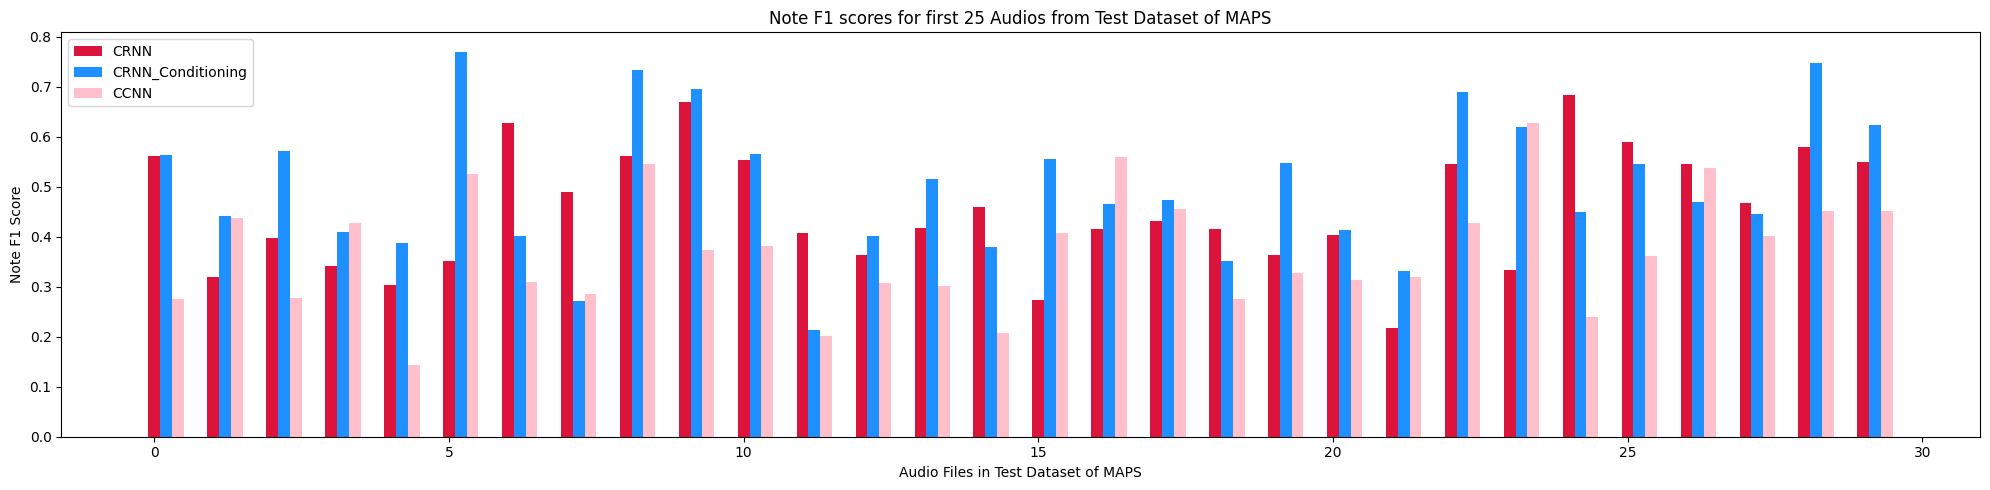

In [14]:
ind = np.arange(N) 
width = 0.2

plt.figure(figsize=(20,5))
bar1 = plt.bar(ind, test_eval['wc'], width, color = 'crimson')
bar2 = plt.bar(ind+width, test_eval['final'], width, color='dodgerblue')
bar3 = plt.bar(ind+width*2,test_eval['wg_wc'], width, color = 'pink')

plt.xlabel("Audio Files in Test Dataset of MAPS")
plt.ylabel('Note F1 Score')
plt.title("Note F1 scores for first 25 Audios from Test Dataset of MAPS")

plt.legend( (bar1, bar2, bar3), ('CRNN', 'CRNN_Conditioning', 'CCNN') )
plt.savefig("test_dataset_MAPS_f1Score.png")
plt.tight_layout()

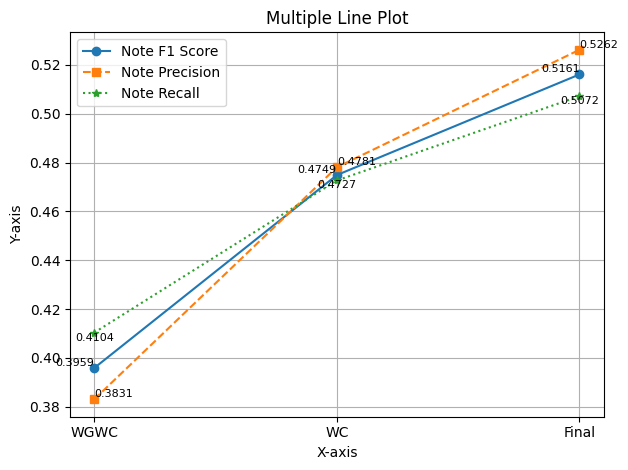

In [38]:
import matplotlib.pyplot as plt

# Sample data for multiple lines
x_values = ['WGWC', 'WC', 'Final']

note_precision = [ccnn_wgru_wcon['value'][64], ccnn_wcon['value'][64], ccnn_final['value'][64]]              # 64
note_recall = [ccnn_wgru_wcon['value'][65], ccnn_wcon['value'][65], ccnn_final['value'][65]]                 # 65
note_f1 = [ccnn_wgru_wcon['value'][66], ccnn_wcon['value'][66], ccnn_final['value'][66]]       # 66


# Plotting multiple lines
plt.plot(x_values, note_f1, marker='o', linestyle='-', label='Note F1 Score')
plt.plot(x_values, note_precision, marker='s', linestyle='--', label='Note Precision')
plt.plot(x_values, note_recall, marker='*', linestyle=':', label='Note Recall')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Line Plot')

# Annotating each point with its y-value for Line 1
for i, y in enumerate(note_f1):
    plt.text(x_values[i], y, f'{y}', ha='right', va='bottom', fontsize=8)

# Annotating each point with its y-value for Line 2
for i, y in enumerate(note_precision):
    plt.text(x_values[i], y, f'{y}', ha='left', va='bottom', fontsize=8)

# Annotating each point with its y-value for Line 3
for i, y in enumerate(note_recall):
    plt.text(x_values[i], y, f'{y}', ha='center', va='top', fontsize=8)

# Display the legend
plt.legend()

# Display the plot
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()


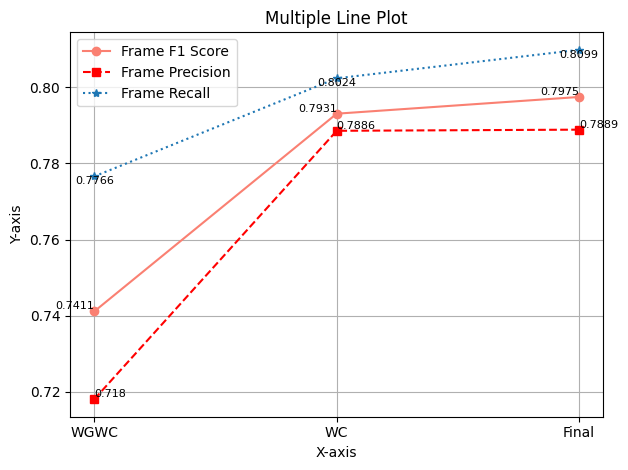

In [39]:
frame_precision = [ccnn_wgru_wcon['value'][61], ccnn_wcon['value'][61], ccnn_final['value'][61]]              # 64
frame_recall = [ccnn_wgru_wcon['value'][62], ccnn_wcon['value'][62], ccnn_final['value'][62]]                 # 65
frame_f1 = [ccnn_wgru_wcon['value'][63], ccnn_wcon['value'][63], ccnn_final['value'][63]]       # 66

plt.plot(x_values, frame_f1, marker='o', linestyle='-', label='Frame F1 Score', c='salmon')
plt.plot(x_values, frame_precision, marker='s', linestyle='--', label='Frame Precision',c='red')
plt.plot(x_values, frame_recall, marker='*', linestyle=':', label='Frame Recall')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Line Plot')

# Annotating each point with its y-value for Line 1
for i, y in enumerate(frame_f1):
    plt.text(x_values[i], y, f'{y}', ha='right', va='bottom', fontsize=8)

# Annotating each point with its y-value for Line 2
for i, y in enumerate(frame_precision):
    plt.text(x_values[i], y, f'{y}', ha='left', va='bottom', fontsize=8)

# Annotating each point with its y-value for Line 3
for i, y in enumerate(frame_recall):
    plt.text(x_values[i], y, f'{y}', ha='center', va='top', fontsize=8)

# Display the legend
plt.legend()

# Display the plot
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()
